<a href="https://colab.research.google.com/github/josenomberto/UTEC-CDIAV3-IAFUND/blob/main/practica_2_grupal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###########################################################################################################
############ Hill Climbing vs Simulated Annealing algorithm to solve the N-queens problem    ##############
############                                                                                 ##############
############ Group Members:
############  - Huancachoque, Yelsing; Jimenez, David; Nomberto, José Carlos; Pinedo, Herles ##############
###########################################################################################################


import random
import time
import math
import matplotlib.pyplot as plt
import numpy as np

def generate_board(n):
  '''
  Description:
    Function to generate a list of integers, where each integer represents the row position of a queen in each column
  Arguments:
    - n : the number of queens (or the square chess board length)
  Return:
    - A list of integers, where each integer represents the row position of a queen in each column
  '''
  return [random.randint(0, n - 1) for _ in range(n)]


def compute_attacks(board):
  '''
  Description:
    Function to calculate the number of attacking pairs of queens on a chessboard
    The function checks for two types of attacks:
    - row attack:      Two queens are in the same row (i.e., board[i] == board[j]).
    - diagonal attack: Two queens are on the same diagonal (i.e., abs(board[i] - board[j]) == abs(i - j)).
  Arguments:
    - board:    a list of integers representing the row position of a queen in each column
  Return:
    - attacks:  the number of attacking pairs of queens
  '''
  attacks = 0
  n = len(board)
  # For each queen in board
  for i in range(n):
    # For each other queens in board
    for j in range(i + 1, n):
      # If the pair queen meets row attack or diagonal attack, increase # attacks
      if board[i] == board[j] or abs(board[i] - board[j]) == abs(i - j):
        attacks += 1
  return attacks


def get_neighbors(board):
  '''
  Description:
    Function to generate a list of neighbors for a given board configuration
    The function generates all possible board configurations by moving a single queen at a time to a different row in the same column.
  Arguments:
    - board:     a list of integers representing the row position of a queen in each column
  Return:
    - neighbors: a list of neighbors for a given board
  '''
  neighbors = []
  n = len(board)
  # Iterate over all the columns (each queen is in a different column)
  for col in range(n):
    # Iterate over all possible rows for the queen in the current column.
    for row in range(n):
      # If the current row is not the row where the queen is currently placed -> valid neighbor
      if board[col] != row:
        neighbor = board.copy()
        neighbor[col] = row
        neighbors.append(neighbor)
  return neighbors


def plot_board(board, title):
  '''
  Description:
    Function to graphycally represent an n-queens solution on a chessboard
    The board is drawn as a grid of alternating white and gray squares (like a chessboard).
  Arguments:
    - board: a list of integers representing the row position of a queen in each column
    - title: a string used as title for the graph
  Output:
    - The chessboard with queens located for best solution
  '''
  n = len(board)
  # Create new figure and axis
  fig, ax = plt.subplots()
  ax.set_title(title)
  # Iterate over each square in chessboard. Even sum indices are colored white, and odd sum indices are colored gray
  for i in range(n):
      for j in range(n):
          color = 'white' if (i + j) % 2 == 0 else 'gray'
          ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
  # Iterate for queens positions and draw queen in chessboard
  for col, row in enumerate(board):
      ax.text(col + 0.5, row + 0.5, '♛', ha='center', va='center', fontsize=18)
  # Format graph
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xlim(0, n)
  ax.set_ylim(0, n)
  plt.gca().invert_yaxis()
  # Show the chessboard graph
  plt.show()


def hill_climbing(n, max_iterations=1000):
  '''
  Description:
    Implementation of the hill climbing algorithm for solving the n-queens problem.
    Hill Climbing algorithm attempts to minimize the number of attacking queens by iteratively moving to neighboring states that have fewer attacks.
    Hill Climbing algorithm process:
    1. Phase 1 - Initial setup:
      - Generate initial board and calculate the number of attacking pairs of queens
    2. Phase 2 - Hill Climbing Iteration
      - Loop through max_iterations (default is 1000)
      - Get neighbors:
      - Compute attacks for each neighbors
      - Find the best neighbor (the one with the lowest attacks)
      - Stopping criteria:
          - if the best neighbor's attacks are = or >= the current attacks, it implies we're stuck in a local maximum, so the search stops
          - if any neighbor has 0 attacks, the search stops because a solution is found (no attacks on the board)
      - Move to the best neighbor: choose a random neighbor (from best neighbors) that has the minimum number of attacks and make a new iteration
  Arguments:
    - n : the number of queens (or the square chess board length)
    - max_iterations: the maximun number of iterations to find a solution (default to 1000)
  Return:
    - board: the best solution as a list of integers representing the row position of a queen in each column
    - current_attacks: the number of attacking pairs of queens for the best solution board
    - end_time - start_time: the executinng time for the hill climbing algorith to find the best solution
  '''
  # Generate initial board
  board = generate_board(n)
  # Calculate the number of attacks for initial board
  current_attacks = compute_attacks(board)
  start_time = time.time()
  # Loop through max_iterations
  for _ in range(max_iterations):
    # Get list of neighbors for board
    neighbors = get_neighbors(board)
    # Get list of of attacks for each neighbor
    neighbor_attacks = [compute_attacks(nb) for nb in neighbors]
    # Get the min attack
    min_attacks = min(neighbor_attacks)
    # If min_attacks is greater than current attack -> no solution found
    if min_attacks >= current_attacks:
      break
    # Get the list of best neighbors and randomly select one
    best_neighbors = [nb for nb, atk in zip(neighbors, neighbor_attacks) if atk == min_attacks]
    board = random.choice(best_neighbors)
    # Update current attacks and if it is 0 -> best solution found
    current_attacks = min_attacks
    if current_attacks == 0:
      break
  end_time = time.time()
  return board, current_attacks, end_time - start_time


def simulated_annealing_2(n, max_iterations=1000, initial_temp=100.0, cooling_rate=0.99):
  '''
  Description:
    Implementation of the simulated annealing algorithm for solving the n-queens problem.
    The simulated annealing algorithm is a probabilistic method for finding a global minimum (in this case, the minimum number of attacking queens)
    and is particularly useful for escaping local optima by allowing occasional "worse" moves early in the search process.
    Simulating Annealing algorithm process:
    1. Phase 1 - Initial setup:
      - Generate Initial Board: The board is generated randomly using generate_board(n).
      - Initial Attacks: The initial number of attacking queens is computed using compute_attacks(board).
      - Temperature: The temperature starts at initial_temp and will decrease over time.
      - Start Timer: The algorithm measures the time it takes to run.
    2. Phase 2 - Main loop up to max_iterations:
      - Neighbor Selection: A random neighbor is selected by picking one of the neighboring board configurations (generated by get_neighbors(board)).
      - Neighbor Attacks: The number of attacks for the selected neighbor is computed.
      - Acceptance Criteria:
        - If the neighbor has fewer attacks (delta < 0), the neighbor configuration is accepted.
        - If the neighbor has more attacks (delta >= 0), it may still be accepted with a probability defined by the Boltzmann distribution:
            acceptance probability = 𝑒^(−Δ/𝑇), where:
            - Δ is the difference in attacks between the neighbor and the current board
            - T is the current temperature. This allows worse moves to be accepted with a decreasing probability as the temperature decreases.
      - Cooling: after each iteration, temperature is reduced by multiplying it with the cooling_rate. This slowly decreases the likelihood of accepting worse moves.
      - Early Stopping: the loop stops early if the temperature falls below  1×10^(−3), or if a solution with zero attacks is found (current_attacks == 0)
  Arguments:
    - n:              the size of the board (number of queens).
    - max_iterations: the maximum number of iterations to run the algorithm.
    - initial_temp:   the initial temperature for the annealing process.
    - cooling_rate:   the rate at which the temperature decreases after each iteration.
  Return:
    - board: the best solution as a list of integers representing the row position of a queen in each column
    - current_attacks: the number of attacking pairs of queens for the best solution board
    - end_time - start_time: the executing time for the simulated annealing algorith to find the best solution
  '''
  # Generate initial board
  board = generate_board(n)
  # Calculate the number of attacks for initial board
  current_attacks = compute_attacks(board)
  temperature = initial_temp
  start_time = time.time()
  # Loop through max_iterations
  for _ in range(max_iterations):
    if current_attacks == 0:
      break
    # Random select a neighbor for board configuration
    neighbor = random.choice(get_neighbors(board))
    # Calculate the number of attacks for selected neighbor
    neighbor_attacks = compute_attacks(neighbor)
    # Calculate delta. If delta < 0 or if acceptance probability is > 0 --> configuration accepted
    delta = neighbor_attacks - current_attacks
    if delta < 0 or random.random() < math.exp(-delta / temperature):
      board = neighbor
      current_attacks = neighbor_attacks
    # Reduce temperature by multiplying it with the cooling_rate and stop if < 1e-3
    temperature *= cooling_rate
    if temperature < 1e-3:
      break
  end_time = time.time()
  return board, current_attacks, end_time - start_time


In [2]:

def accept_solution(delta, temperature):
  if delta < 0:
    return True
  else:
    # random value between [0, 1]
    r = np.random.rand()
    if r < np.exp(-delta/temperature):
      return True
    else:
      return False

def simulated_annealing(n, max_iterations=1000, max_temp=100.0, min_temp=1e-3, cooling_rate=0.99):
  board = generate_board(n)
  current_attacks = compute_attacks(board)
  for _ in range(max_iterations):
    if current_attacks == 0:
      break
    temperature = max_temp
    start_time = time.time()
    while (temperature > min_temp):
      neighbor = random.choice(get_neighbors(board))
      neighbor_attacks = compute_attacks(neighbor)
      delta = neighbor_attacks - current_attacks
      if accept_solution(delta, temperature):
        board = neighbor
        current_attacks = neighbor_attacks
      temperature *= cooling_rate
  end_time = time.time()
  return board, current_attacks, end_time - start_time


############################################################
Search Algorithm: Hill Climbing
 - Best Solution: [9, 17, 12, 3, 16, 0, 19, 15, 8, 6, 2, 13, 5, 18, 18, 14, 10, 7, 1, 4]
 - Fitness: 3
 - Execution Time: 0.09063



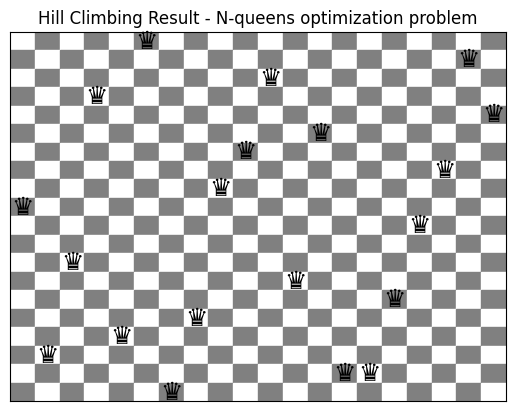


############################################################
Search Algorithm: Simulated Annealing
 - Best Solution: [16, 8, 10, 18, 4, 1, 11, 17, 7, 13, 3, 9, 2, 15, 5, 12, 19, 6, 0, 14]
 - Fitness: 0
 - Execution Time: 0.10334



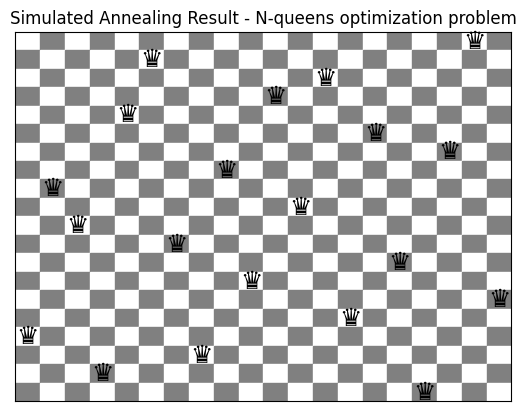

In [ ]:
############ Execution for specific number of queens

n = 20
hc_board, hc_attacks, hc_time = hill_climbing(n)
sa_board, sa_attacks, sa_time = simulated_annealing(n)

# Results
print('#'*60)
print('Search Algorithm: Hill Climbing')
print(f' - Best Solution: {hc_board}')
print(f' - Fitness: {hc_attacks}')
print(f' - Execution Time: {round(hc_time,5)}')
print('')
plot_board(hc_board, 'Hill Climbing Result - N-queens optimization problem')
print('')
print('#'*60)
print('Search Algorithm: Simulated Annealing')
print(f' - Best Solution: {sa_board}')
print(f' - Fitness: {sa_attacks}')
print(f' - Execution Time: {round(sa_time,5)}')
print('')
plot_board(sa_board, "Simulated Annealing Result - N-queens optimization problem")
print('')


In [6]:
############ Execution over a range of n-queens

### Getting results
queens = 25
results = {}
for n in range(2,queens+1):
  print(n)
  hc_board, hc_attacks, hc_time = hill_climbing(n)
  sa_board, sa_attacks, sa_time = simulated_annealing(n)
  results[n] = {'hc':{'board':hc_board, 'attacks':hc_attacks,'time':hc_time},
                'sa':{'board':sa_board, 'attacks':sa_attacks,'time':sa_time}}

print(results)

### Plotting results

# Extract data for plotting
n_values = sorted(results.keys())
hc_attacks = [results[n]['hc']['attacks'] for n in n_values]
sa_attacks = [results[n]['sa']['attacks'] for n in n_values]
hc_times = [results[n]['hc']['time'] for n in n_values]
sa_times = [results[n]['sa']['time'] for n in n_values]

# Plot 1: Attacks HC vs SA Comparison
plt.figure(figsize=(8, 5))
plt.plot(n_values, hc_attacks, label='Hill Climbing', marker='o')
plt.plot(n_values, sa_attacks, label='Simulated Annealing', marker='s')
plt.title('Fitness HC vs SA Comparison')
plt.xlabel('N (Board Size)')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Time HC vs SA Comparison
plt.figure(figsize=(8, 5))
plt.plot(n_values, hc_times, label='Hill Climbing', marker='o')
plt.plot(n_values, sa_times, label='Simulated Annealing', marker='s')
plt.title('Execution Time HC vs SA Comparison')
plt.xlabel('N (Board Size)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




TypeError: 'int' object is not callable